## ** Definicja Autokorelacji**  

Autokorelacja opisuje stopień zależności między wartościami procesu losowego oddzielonymi opóźnieniem $ h $. Formalnie, dla stacjonarnego procesu losowego $ \{X_t\} $ definiujemy funkcję autokowariancji:

$$
\gamma(h) = \mathbb{E}[(X_t - \mu)(X_{t+h} - \mu)]
$$

gdzie:  
- $ \mu = \mathbb{E}[X_t] $ – wartość oczekiwana procesu,  
- $ \mathbb{E} $ – operator wartości oczekiwanej.  

Funkcja autokorelacji (ACF) jest normalizowaną wersją autokowariancji:

$$
\rho(h) = \frac{\gamma(h)}{\gamma(0)}
$$

gdzie $ \gamma(0) = \text{Var}(X_t) $ jest wariancją procesu.  

W praktyce interesuje nas zarówno **teoretyczna funkcja autokorelacji** (wynikająca z modelu), jak i jej **empiryczna estymacja** na podstawie próby.

---

## **3. Modele Procesów Losowych i Ich Autokorelacja**  

### **3.1. Biały szum**  

Biały szum to proces, w którym wartości $ X_t $ są niezależnymi zmiennymi losowymi o stałej wariancji $ \sigma^2 $:

$$
X_t \sim N(0, \sigma^2)
$$

Dla tego procesu autokorelacja wynosi:

$$
\rho(h) =
\begin{cases} 
1, & h = 0 \\
0, & h \neq 0
\end{cases}
$$

co oznacza, że wartości $ X_t $ nie wykazują żadnej zależności czasowej.

---

### **3.2. Proces autoregresyjny AR(1)**  

Proces AR(1) opisuje liniową zależność między kolejnymi wartościami:

$$
X_t = \theta X_{t-1} + Z_t
$$

gdzie:  
- $ \theta $ – parametr autoregresji,  
- $ Z_t \sim N(0, \sigma^2) $ – biały szum.  

Autokorelacja dla procesu AR(1) wynosi:

$$
\rho(h) = \theta^{|h|}
$$

co oznacza, że zależność maleje wykładniczo wraz ze wzrostem opóźnienia $ h $. Im większa wartość $ |\theta| $, tym dłużej utrzymuje się zależność między wartościami.

Przykłady:
- Dla $ \theta = 0.9 $, autokorelacja maleje wolno, wartości procesu są silnie zależne.  
- Dla $ \theta = 0.2 $, autokorelacja szybko zanika, wartości są mniej zależne.  

---

## **Autokorelacja empiryczna**  
W rzeczywistych danych nie znamy dokładnych wartości oczekiwanych i wariancji, dlatego używamy ich estymatorów. **Empiryczna funkcja autokorelacji (ACF)** jest zdefiniowana jako:  
$$
\hat{R}(h) = \frac{1}{n} \sum_{t=1}^{n-h} (X_t - \bar{X}) (X_{t+h} - \bar{X})
$$  
gdzie $ \bar{X} $ to średnia próbki.  

---

In [1]:
import sys

sys.path.append("..")

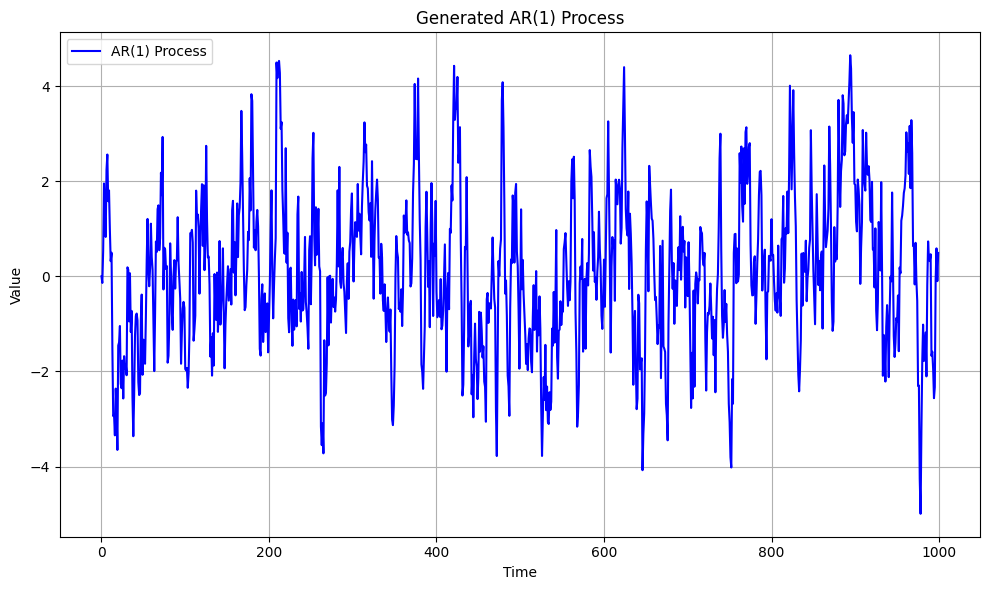

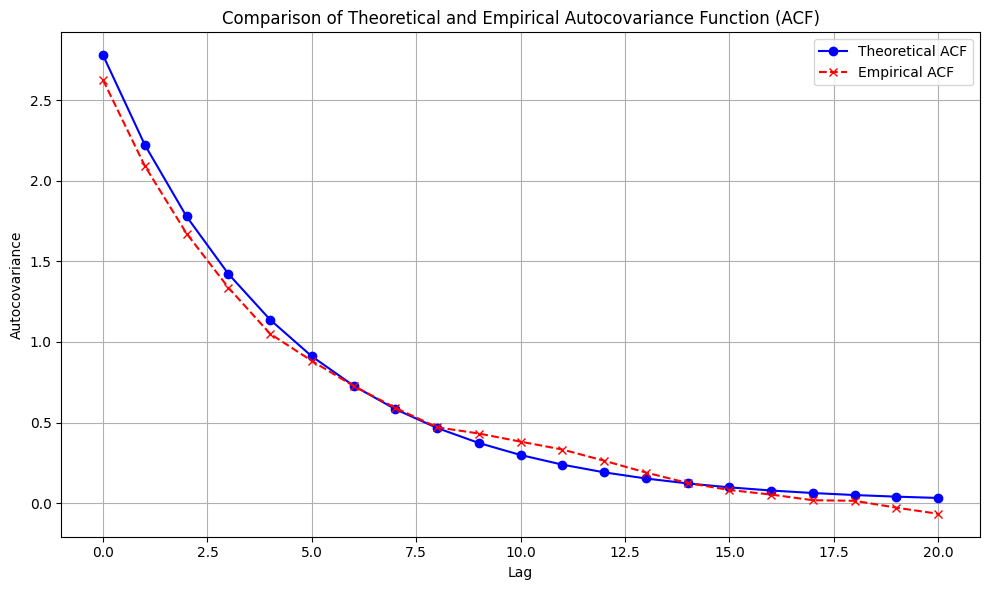

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.functions import empirical_acf

# Parameters for the AR(1) model
phi = 0.8  # AR(1) coefficient
n = 1000  # Number of samples
sigma = 1  # Standard deviation of white noise

# Generate AR(1) process data
np.random.seed(42)
epsilon = np.random.normal(0, sigma, n)  # White noise
X = np.zeros(n)
for t in range(1, n):
    X[t] = phi * X[t - 1] + epsilon[t]

# Plot the generated AR(1) process
plt.figure(figsize=(10, 6))
plt.plot(X, label="AR(1) Process", color="blue")
plt.title("Generated AR(1) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute theoretical autocovariance function (ACF)
lags = np.arange(0, 21)  # Lags from 0 to 20
gamma_0 = sigma**2 / (1 - phi**2)  # Variance (gamma_0)
theoretical_ACF = gamma_0 * phi**lags  # Theoretical ACF: gamma_k = gamma_0 * phi^k

# Compute empirical autocovariance function (ACF)
empirical_ACF = empirical_acf(X, 20)

# Plot comparison of theoretical and empirical ACF
plt.figure(figsize=(10, 6))
plt.plot(
    lags,
    theoretical_ACF,
    label="Theoretical ACF",
    color="blue",
    linestyle="-",
    marker="o",
)
plt.plot(
    lags, empirical_ACF, label="Empirical ACF", color="red", linestyle="--", marker="x"
)
plt.title("Comparison of Theoretical and Empirical Autocovariance Function (ACF)")
plt.xlabel("Lag")
plt.ylabel("Autocovariance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

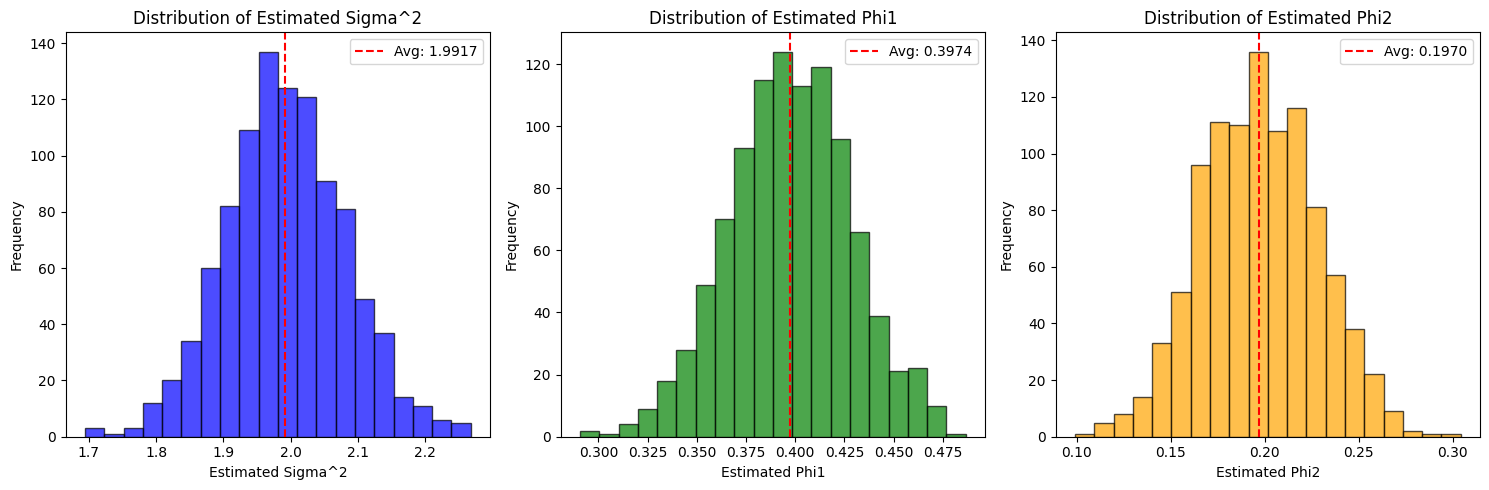

In [3]:
from src.functions import estimate_ar_parameters

mu = 0
sig = np.sqrt(2)
phi1 = 0.4
phi2 = 0.2

n = 1000
mc = 1000
xt = np.zeros(n)
for i in range(1, n):
    xt[i] = mu + phi1 * xt[i - 1] + phi2 * xt[i - 2] + np.random.normal(0, sig)


# Monte Carlo simulations
mc_estimates = []
for _ in range(mc):
    xt = np.zeros(n)
    for i in range(2, n):
        xt[i] = mu + phi1 * xt[i - 1] + phi2 * xt[i - 2] + np.random.normal(0, sig)
    mc_estimates.append(estimate_ar_parameters(xt, 2))

# Extract estimates from Monte Carlo simulations
est_sig_values = [est[0] for est in mc_estimates]
est_phi1_values = [est[1] for est in mc_estimates]
est_phi2_values = [est[2] for est in mc_estimates]
avg_est_sig = np.mean(est_sig_values)
avg_est_phi1 = np.mean(est_phi1_values)
avg_est_phi2 = np.mean(est_phi2_values)
# Plot histograms of the estimates
plt.figure(figsize=(15, 5))

# Plot for sigma^2
plt.subplot(1, 3, 1)
plt.hist(est_sig_values, bins=20, color="blue", alpha=0.7, edgecolor="black")
plt.axvline(
    avg_est_sig,
    color="red",
    linestyle="dashed",
    linewidth=1.5,
    label=f"Avg: {avg_est_sig:.4f}",
)
plt.title("Distribution of Estimated Sigma^2")
plt.xlabel("Estimated Sigma^2")
plt.ylabel("Frequency")
plt.legend()

# Plot for phi1
plt.subplot(1, 3, 2)
plt.hist(est_phi1_values, bins=20, color="green", alpha=0.7, edgecolor="black")
plt.axvline(
    avg_est_phi1,
    color="red",
    linestyle="dashed",
    linewidth=1.5,
    label=f"Avg: {avg_est_phi1:.4f}",
)
plt.title("Distribution of Estimated Phi1")
plt.xlabel("Estimated Phi1")
plt.ylabel("Frequency")
plt.legend()

# Plot for phi2
plt.subplot(1, 3, 3)
plt.hist(est_phi2_values, bins=20, color="orange", alpha=0.7, edgecolor="black")
plt.axvline(
    avg_est_phi2,
    color="red",
    linestyle="dashed",
    linewidth=1.5,
    label=f"Avg: {avg_est_phi2:.4f}",
)
plt.title("Distribution of Estimated Phi2")
plt.xlabel("Estimated Phi2")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

### **Empiryczna Estymacja Funkcji Autokorelacji Częściowej (PACF)**

Empiryczna funkcja autokorelacji częściowej (PACF) to narzędzie służące do analizy zależności między obserwacjami w szeregach czasowych. W przeciwieństwie do funkcji autokorelacji (ACF), która mierzy ogólną zależność między dwiema wartościami na różnych opóźnieniach (lagach), PACF mierzy zależność między dwiema wartościami, usuwając wpływ wszystkich innych pośrednich zmiennych, które mogą pośredniczyć w tej zależności.

#### **1. Ogólna Definicja PACF**

Funkcja autokorelacji częściowej dla opóźnienia $ h $ mierzy korelację między $ X_t $ i $ X_{t+h} $ po wyeliminowaniu wpływu wszystkich wartości pośrednich $ X_{t+1}, X_{t+2}, \dots, X_{t+h-1} $. Można to formalnie zapisać jako:

$$
\text{PACF}(h) = \text{corr}(X_t, X_{t+h} | X_{t+1}, X_{t+2}, \dots, X_{t+h-1})
$$

gdzie:
- $ \text{corr}(X_t, X_{t+h} | X_{t+1}, \dots, X_{t+h-1}) $ oznacza korelację między $ X_t $ i $ X_{t+h} $, po uwzględnieniu (czyli usunięciu wpływu) wszystkich zmiennych pośrednich.

#### **2. Empiryczna Estymacja PACF**

Empiryczna estymacja PACF jest oparta na danych z szeregu czasowego i pozwala na oszacowanie funkcji PACF dla różnych opóźnień $ h $. Jest to szczególnie użyteczne, gdy chcemy oszacować zależności w szeregach czasowych bez założenia o znanej postaci rozkładu.

Aby oszacować PACF empirycznie, używa się metod regresji liniowej. Każdy składnik PACF dla danego opóźnienia $ h $ jest obliczany przez dopasowanie modelu autoregresyjnego i analizowanie reszt.
---
### **Wyznaczanie wartości PACF na podstawie układu Yule'a-Walkera:**

Metoda Yule'a-Walkera jest jedną z najpopularniejszych metod służących do wyznaczania PACF w analizie szeregów czasowych. Podstawowe założenia tej metody to:

1. **Macierz autokowariancji**:
   Aby obliczyć wartości PACF, musimy najpierw wyznaczyć **macierz autokowariancji** $ \Gamma $, która zawiera autokowariancje pomiędzy punktami czasowymi $ t $ i $ t+h $. Wartość autokowariancji między $ X_t $ a $ X_{t+h} $ jest wyrażona jako:
   
   $$
   \gamma(h) = \text{Cov}(X_t, X_{t+h})
   $$

2. **Układ równań Yule'a-Walkera**:
   Układ równań do obliczenia PACF dla $ h $ ma postać:

   $$
   \begin{bmatrix}
   \gamma(0) & \gamma(1) & \cdots & \gamma(h-1) \\
   \gamma(1) & \gamma(0) & \cdots & \gamma(h-2) \\
   \vdots & \vdots & \ddots & \vdots \\
   \gamma(h-1) & \gamma(h-2) & \cdots & \gamma(0) \\
   \end{bmatrix}
   \begin{bmatrix}
   \phi_1 \\
   \phi_2 \\
   \vdots \\
   \phi_{h-1}
   \end{bmatrix}
   =
   \begin{bmatrix}
   \gamma(1) \\
   \gamma(2) \\
   \vdots \\
   \gamma(h)
   \end{bmatrix}
   $$

   Po rozwiązaniu tego układu równań, uzyskujemy współczynniki $ \phi_1, \phi_2, ..., \phi_h $, które są współczynnikami regresji. Ostatni współczynnik $ \phi_h $ jest właśnie wartością PACF dla opóźnienia $ h $.
   
---


### **Podsumowanie:**

- **PACF** mierzy **czystą** zależność między dwoma punktami szeregu czasowego $ X_t $ i $ X_{t+h} $, eliminując wpływ innych zmiennych pośrednich.
- Dla każdego opóźnienia $ h $ przeprowadza się regresję, w której przewiduje się wartość $ X_{t+h} $ na podstawie poprzednich obserwacji $ X_t, X_{t+1}, \dots, X_{t+h-1} $.
- Wartość **PACF(h)** odpowiada za współczynnik regresji, który jest miarą zależności między $ X_t $ a $ X_{t+h} $ po uwzględnieniu wszystkich zmiennych pośrednich.

Ten ogólny wzór regresji jest podstawą dla obliczeń **empirycznego PACF** w różnych kontekstach analizy szeregów czasowych.




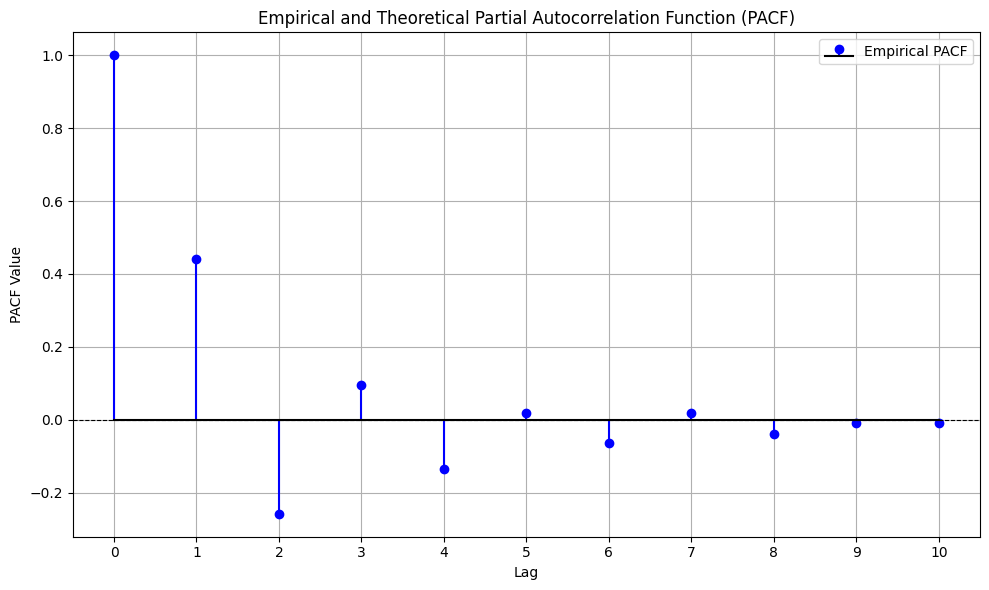

In [4]:
from src.functions import empirical_pacf

mu = 0
sig = 1
teta = 0.6
n = 1000
zt = np.random.normal(mu, sig, n)
xt = np.zeros(n)
for i in range(1, n):
    xt[i] = teta * zt[i - 1] + zt[i]

max_lag = 10
empirical_pacf_values = empirical_pacf(xt, max_lag)

# Plot the empirical and theoretical PACF values using stem
plt.figure(figsize=(10, 6))
(markerline, stemlines, baseline) = plt.stem(
    range(max_lag + 1),
    empirical_pacf_values,
    linefmt="blue",
    markerfmt="bo",
    basefmt="black",
    label="Empirical PACF",
)
plt.setp(stemlines, "linewidth", 1.5)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Empirical and Theoretical Partial Autocorrelation Function (PACF)")
plt.xlabel("Lag")
plt.ylabel("PACF Value")
plt.xticks(range(max_lag + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()